Scaling and Clustering of the spotify library:

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [6]:
sp_library = pd.read_csv('library_spotify/df_features_library.csv')

In [7]:
sp_library.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

Columns for clustering:
'danceability'
'energy'
'loudness'
'speechiness'  # detects the presence of spoken words in a track
'acousticness'
'instrumentalness'
'liveness'  # Detects the presence of an audience in the recording
'valence'  # A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
'tempo'


Add later when data exists:
'time_signature'
'popularity'

In [14]:
X = sp_library[['danceability',
                'energy',
                'loudness',
                'speechiness',
                'acousticness',
               'instrumentalness',
               'liveness', 
                'valence',  
                'tempo']]

In [16]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.613,0.764,-6.509,0.1360,0.0527,0.000000,0.1970,0.417,160.015
1,0.687,0.845,-4.370,0.0576,0.1000,0.000000,0.0452,0.809,87.972
2,0.818,0.803,-4.282,0.0797,0.0340,0.000000,0.1530,0.632,106.970
3,0.624,0.876,-3.374,0.1000,0.0735,0.000000,0.3270,0.781,99.943
4,0.614,0.379,-10.480,0.0476,0.6070,0.000464,0.0986,0.201,107.989


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.305405,0.519172,-0.257141,1.693129,-0.582002,-0.102163,0.497233,-0.806870,1.635437
1,0.335365,1.036811,0.785559,-0.105046,-0.343670,-0.102163,-1.129701,1.073476,-0.905224
2,1.469701,0.768406,0.828457,0.401837,-0.676226,-0.102163,0.025658,0.224442,-0.235243
3,-0.210155,1.234919,1.271080,0.867436,-0.477196,-0.102163,1.890523,0.939165,-0.483056
4,-0.296746,-1.941208,-2.192887,-0.334406,2.210968,-0.096083,-0.557380,-1.842979,-0.199307


In [17]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=3, random_state=1234)

In [18]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

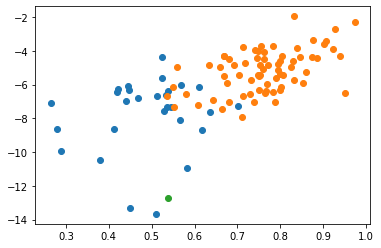

In [19]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [20]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    28
1    71
2     1
dtype: int64

In [21]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10588\3390344749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.613,0.764,-6.509,0.1360,0.05270,0.000000,0.1970,0.417,160.015,1
1,0.687,0.845,-4.370,0.0576,0.10000,0.000000,0.0452,0.809,87.972,1
2,0.818,0.803,-4.282,0.0797,0.03400,0.000000,0.1530,0.632,106.970,1
3,0.624,0.876,-3.374,0.1000,0.07350,0.000000,0.3270,0.781,99.943,1
4,0.614,0.379,-10.480,0.0476,0.60700,0.000464,0.0986,0.201,107.989,0
...,...,...,...,...,...,...,...,...,...,...
95,0.706,0.751,-6.323,0.0708,0.17300,0.000000,0.1680,0.195,91.031,1
96,0.751,0.783,-3.724,0.0859,0.00379,0.000000,0.0360,0.816,119.975,1
97,0.743,0.766,-6.375,0.0265,0.08730,0.000000,0.5090,0.610,127.960,1
98,0.672,0.738,-7.045,0.0506,0.01780,0.000068,0.0927,0.392,107.938,1


In [22]:
X[X['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
7,0.415,0.538,-12.71,0.0368,0.4,0.767,0.0674,0.449,95.121,2


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

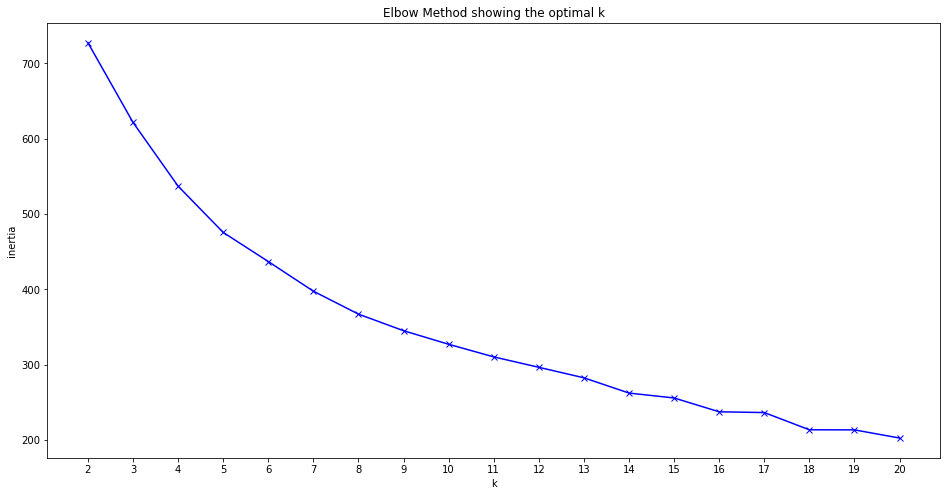

In [23]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

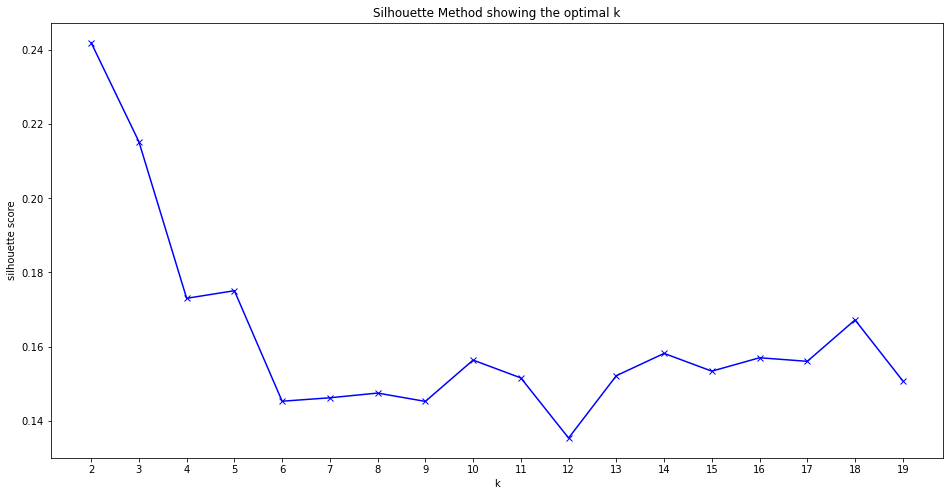

In [26]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
     
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

ModuleNotFoundError: No module named 'yellowbrick'